In [1]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import math


font = {'family' : 'normal',
        'weight' : 'bold'}
matplotlib.rc('font', **font)

%matplotlib inline

In [2]:
# Source of dataset: http://archive.ics.uci.edu/ml/datasets/Bank+Marketing

df = pd.read_csv('bank-additional-full.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week','campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed']
df_features = df[features]

In [7]:
categorical_features = ['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

df_features = pd.concat([df_features.drop(categorical_features, axis=1), pd.get_dummies(df_features[categorical_features], drop_first=True)], axis=1)

In [12]:
df_labels = df[['y']]
df_labels = pd.get_dummies(df_labels)[['y_yes']].rename(columns={'y_yes':'y'})

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_features)

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(scaled_features)
x_pca = pca.transform(scaled_features)
x_pca.shape

(41188, 3)

/Users/richardng/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


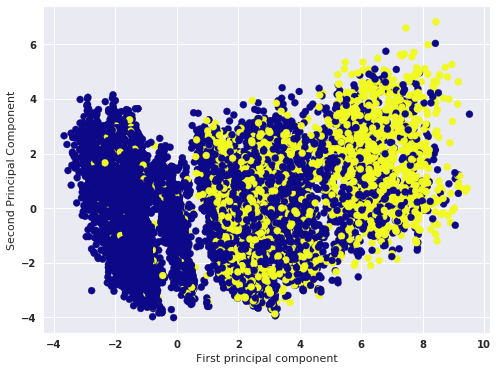

In [13]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df_labels['y'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

/Users/richardng/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning:

No labelled objects found. Use label='...' kwarg on individual plots.

/Users/richardng/anaconda/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning:

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans



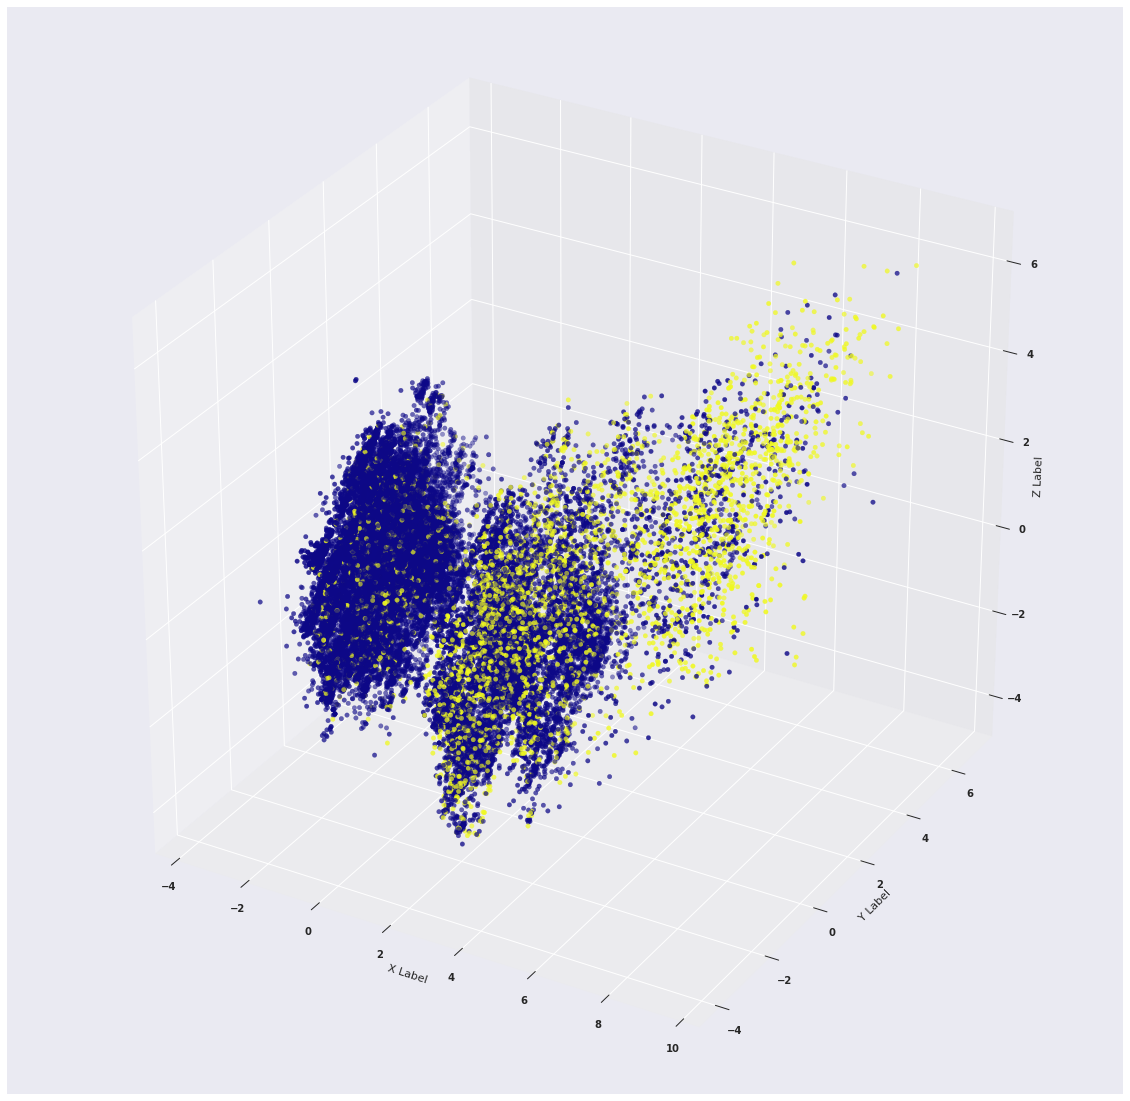

In [36]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np


def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')
xs = x_pca[:,0]
ys = x_pca[:,1]
zs = x_pca[:,2]
ax.scatter(xs, ys, zs, c=df_labels['y'], cmap='plasma')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.legend()
plt.show()


In [31]:
import plotly
from plotly import tools
plotly.tools.set_credentials_file(username='ng-kode', api_key='tXdog386jStP4wPZ1JO1')
from plotly.graph_objs import *

In [35]:
import plotly.plotly as py
import plotly.graph_objs as go

import numpy as np

x = x_pca[df_labels[df_labels['y']==0].index.values, 0]
y = x_pca[df_labels[df_labels['y']==0].index.values, 1]
z = x_pca[df_labels[df_labels['y']==0].index.values, 2]
trace1 = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=12,
        line=dict(
            color='rgba(217, 217, 217, 0.14)',
            width=0.5
        ),
        opacity=0.8
    )
)

x2 = x_pca[df_labels[df_labels['y']==1].index.values, 0]
y2 = x_pca[df_labels[df_labels['y']==1].index.values, 1]
z2 = x_pca[df_labels[df_labels['y']==1].index.values, 2]
trace2 = go.Scatter3d(
    x=x2,
    y=y2,
    z=z2,
    mode='markers',
    marker=dict(
        color='rgb(127, 127, 127)',
        size=12,
        symbol='circle',
        line=dict(
            color='rgb(204, 204, 204)',
            width=1
        ),
        opacity=0.9
    )
)
data = [trace1, trace2]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='simple-3d-scatter')